In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from plotter import *
import glob, os
import seaborn as sb

In [2]:
def get_objective(conn):
    """
    Retrieves the objective function
    """
    cursor = conn.cursor()
    command = "SELECT * FROM Output_Objective"
    cursor.execute(command)
    obj_value = cursor.fetchall()[0][-1]
    
    return obj_value

In [3]:
pygen_inp = glob.glob('simulations/illinois/zero_nuclear_RE_sensitivity/*.py')
print(len(pygen_inp))

121


In [4]:
path = 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/*V2.sqlite'
data_files = glob.glob(path, recursive=True)
data_files.sort()
data_files.append('simulations/illinois/zero_nuclear/IL_ZN_CC30_52.sqlite')
data_files

['simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2010_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2011_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2012_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2013_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2014_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2015_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2016_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2017_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2018_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S2010_W2019_52_V2.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity

In [5]:
region = 'IL'
comm = 'ELC'
frames = []
for file in data_files:
    conn = sqlite3.connect(file)
    df = get_annual_capacity(conn, region, comm)
    final_year = df[df.index==2050]
    final_year['Objective_Value'] = get_objective(conn)
    frames.append(final_year)
df = pd.concat(frames)

<ipython-input-5-310931bd8ef3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_year['Objective_Value'] = get_objective(conn)


In [6]:
df.fillna(0, inplace=True)
df

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
year,,,,,,,,
2050,4087.4166,2255.6,72162.505,688.8,0.0,103122.030,44514.674,182390.601444
2050,5679.5156,2255.6,65633.594,688.8,0.0,85602.187,48905.828,177991.471277
2050,12625.1090,2255.6,56660.241,688.8,0.0,54997.926,55845.241,184183.020722
2050,6578.1062,2255.6,72050.973,688.8,0.0,104530.920,35733.439,180761.609373
2050,14307.7590,2255.6,58480.932,688.8,0.0,74412.527,41995.443,186010.866883
...,...,...,...,...,...,...,...,...
2050,11407.9090,2255.6,69840.320,688.8,0.0,111691.040,31288.231,190799.469411
2050,9180.0579,2255.6,69123.523,688.8,0.0,111698.580,36631.756,189451.761693
2050,8001.9178,2255.6,65824.794,688.8,0.0,84615.690,48503.873,182607.510786


In [7]:
df.describe()

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
count,122.000000,1.220000e+02,122.000000,1.220000e+02,122.0,122.000000,122.000000,122.000000
mean,9473.203965,2.255600e+03,65029.698484,6.888000e+02,0.0,92535.407934,42853.453820,185348.190106
std,3193.425109,3.196358e-12,4355.616729,1.598179e-12,0.0,16677.810645,5955.028767,4894.376606
min,2540.656600,2.255600e+03,53439.910000,6.888000e+02,0.0,54997.926000,28454.481000,163307.488963
25%,6886.608625,2.255600e+03,62260.316000,6.888000e+02,0.0,78626.147750,38190.342500,182568.923841
50%,9298.992300,2.255600e+03,65315.952000,6.888000e+02,0.0,93798.340000,43129.130000,184954.199499
75%,12166.814000,2.255600e+03,68702.396250,6.888000e+02,0.0,105192.375000,47591.430750,188396.561208
max,16069.894000,2.255600e+03,72400.186000,6.888000e+02,0.0,128236.960000,55845.241000,197698.059143


In [8]:
techs = list(df.columns[:-1])

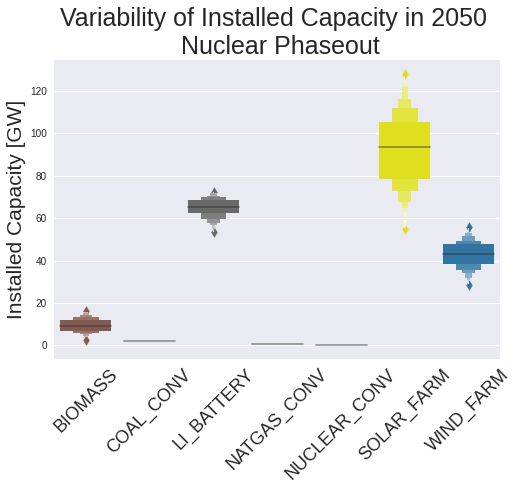

In [9]:
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
# (df[techs]/1000).boxplot()
sb.boxenplot(data=(df[techs]/1000), palette=elc_colors)
plt.title('Variability of Installed Capacity in 2050 \n Nuclear Phaseout', fontsize=25)
plt.ylabel('Installed Capacity [GW]', fontsize=21)
plt.xticks(fontsize=18, rotation=45)
plt.show()

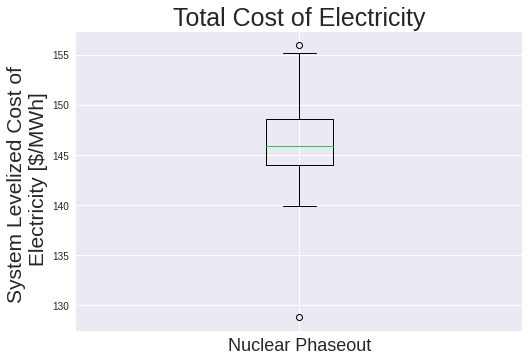

In [10]:
demand = 1267698.8
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
plt.boxplot(df['Objective_Value']/demand*1000)

plt.title('Total Cost of Electricity', fontsize=25)
plt.ylabel('System Levelized Cost of \n Electricity [$/MWh]', fontsize=21)
plt.xticks([1],['Nuclear Phaseout'],fontsize=18)
plt.show()

In [11]:
df = df.reset_index().drop(columns='year')

In [12]:
(df['Objective_Value']).to_csv('data/objective_value_ZN_V2.csv')

<AxesSubplot:>

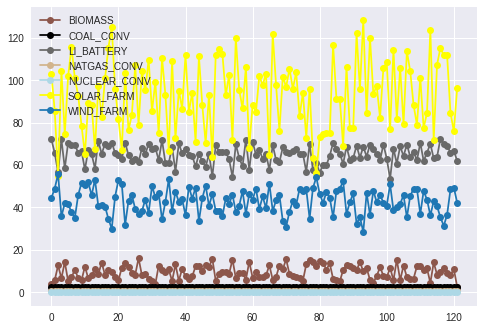

In [13]:
(df[techs]/1000).plot(marker='o', color=elc_colors)

The plot above suggests that biomass is useful when there is slightly less penetration of VREs. Biomass serves as baseload power and is relatively inflexible.

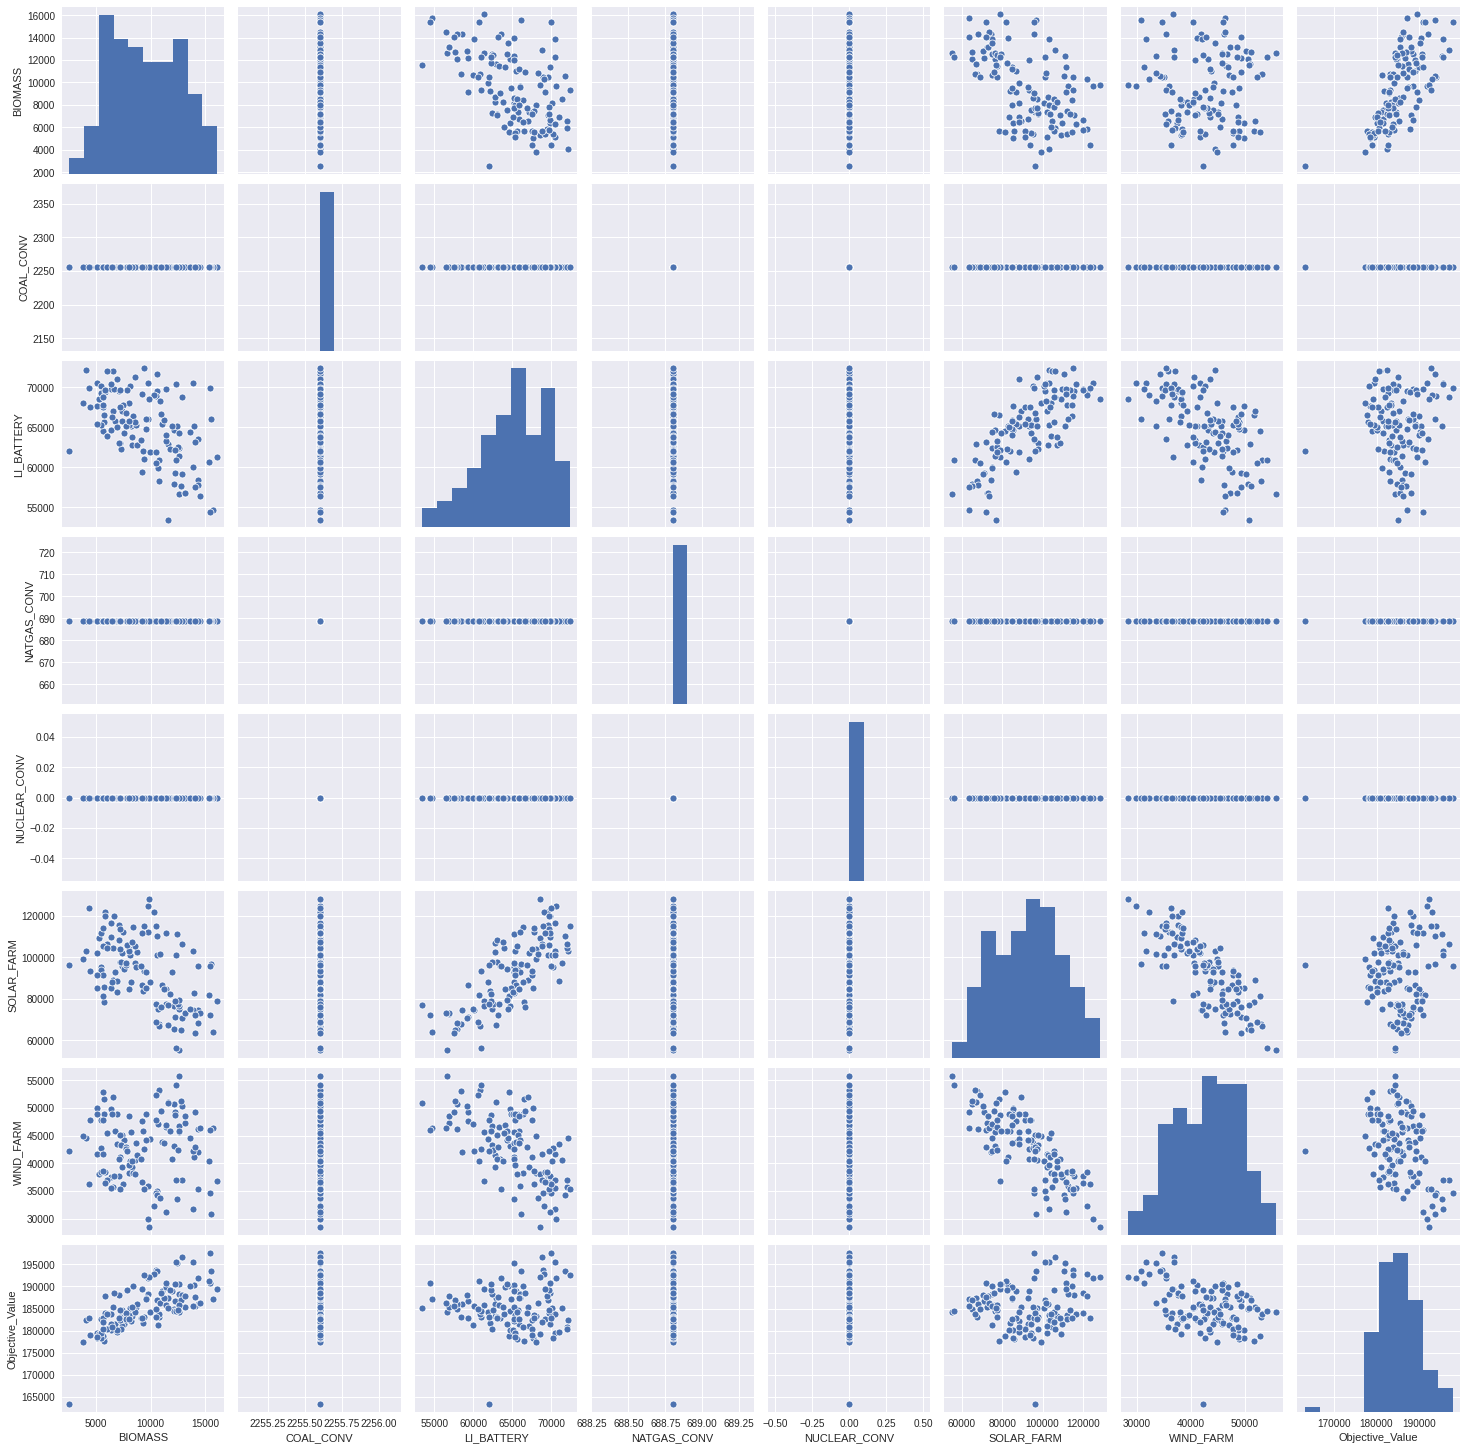

In [14]:
sb.pairplot(df)

In [15]:
conn = sqlite3.connect(data_files[0])
fulldf = get_annual_capacity(conn, region, comm)
for i,file in enumerate(data_files):
    if i == 0:
        continue
    conn = sqlite3.connect(file)
    inter_df = get_annual_capacity(conn, region, comm)
    frames = [fulldf, inter_df]
    fulldf = pd.concat(frames)

In [16]:
fulldf.fillna(0, inplace=True)
fulldf

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM
year,,,,,,,
2025,0.0000,7505.90,1427.844,16371.60,12415.10,267.200,9621.8442
2030,4087.4166,5045.24,33050.743,16332.70,9387.20,47376.638,20625.0360
2035,4087.4166,2815.74,39072.712,15903.98,8377.90,55965.544,24312.8200
2040,4087.4166,2444.40,43574.602,5023.32,7909.90,62390.284,27075.9920
2045,4087.4166,2357.04,62192.595,688.80,2415.16,88912.374,38425.4960
...,...,...,...,...,...,...,...
2030,2359.0067,5045.24,28834.851,16332.70,9387.20,46897.832,20674.3610
2035,2359.0067,2815.74,33849.177,15903.98,8377.90,54554.791,24031.7680
2040,2359.0067,2444.40,37643.531,5023.32,7909.90,60298.608,26541.5480


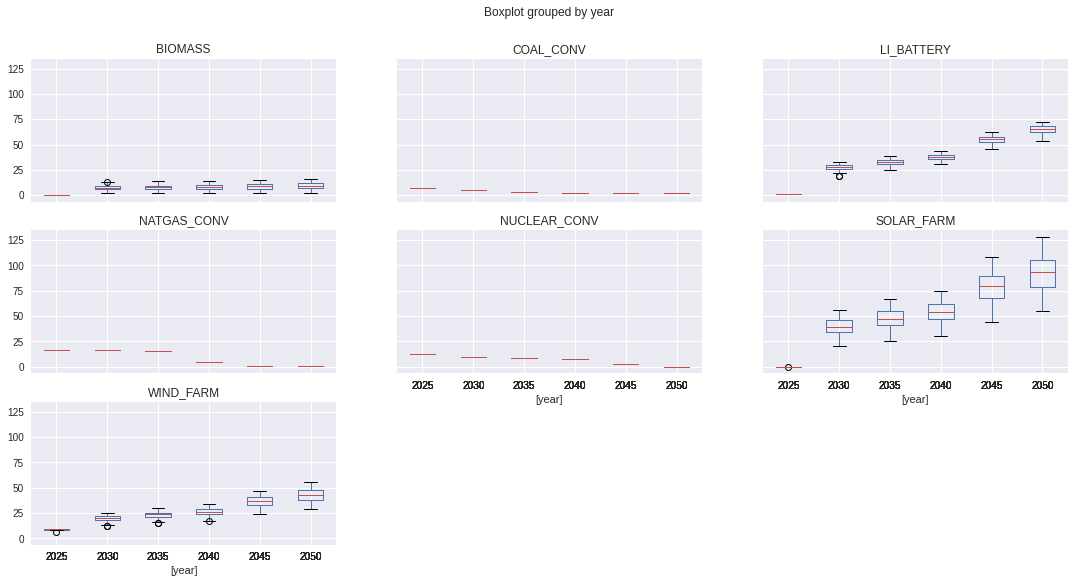

In [17]:
(fulldf/1000).boxplot(by='year', figsize=(18,9))
plt.xlabel('Installed Capacity [GW]')
plt.show()

In [18]:
conn = sqlite3.connect('simulations/illinois/zero_nuclear/IL_ZN_CC30_52.sqlite')

In [19]:
get_objective(conn)

163307.48896325292

In [20]:
(df[techs]/1000).to_csv('data/results/installed_capacity_2050_ZN_V2.csv')
(fulldf[techs]/1000).to_csv('data/results/installed_capacity_full_ZN_V2.csv')